# chandralc


In [1]:
# on import, the file index will be downloaded
import chandralc as clc
from chandralc import download, convert

## Searching for files with J2000 coordinates

In [2]:
# This process will take about a minute to compare coordinates with all files in the database
coords = "14 03 14.3 +54 18 06.2"
files = download.coordinate_search(coords)

In [3]:
files

['J140314.302+541806.23_934_lc_ascii.txt',
 'J140314.302+541806.23_4731_lc_ascii.txt',
 'J140314.302+541806.23_4732_lc_ascii.txt',
 'J140314.302+541806.23_4733_lc_ascii.txt',
 'J140314.302+541806.23_4734_lc_ascii.txt',
 'J140314.302+541806.23_4735_lc_ascii.txt',
 'J140314.302+541806.23_4736_lc_ascii.txt',
 'J140314.302+541806.23_4737_lc_ascii.txt',
 'J140314.302+541806.23_5297_lc_ascii.txt',
 'J140314.302+541806.23_5300_lc_ascii.txt',
 'J140314.302+541806.23_5309_lc_ascii.txt',
 'J140314.302+541806.23_5322_lc_ascii.txt',
 'J140314.302+541806.23_5323_lc_ascii.txt',
 'J140314.302+541806.23_5337_lc_ascii.txt',
 'J140314.302+541806.23_5338_lc_ascii.txt',
 'J140314.302+541806.23_5339_lc_ascii.txt',
 'J140314.302+541806.23_5340_lc_ascii.txt',
 'J140314.302+541806.23_6114_lc_ascii.txt',
 'J140314.302+541806.23_6115_lc_ascii.txt',
 'J140314.302+541806.23_6118_lc_ascii.txt',
 'J140314.302+541806.23_6152_lc_ascii.txt',
 'J140314.302+541806.23_6169_lc_ascii.txt',
 'J140314.302+541806.23_6170_lc_a

## Getting galaxy to which the source belongs

In [4]:
download.get_galaxy(files[0])

'M101'

## Extracting coordinates from filename

In [5]:
coordinates = convert.extract_coords(files[0])

In [6]:
coordinates

'14 03 14.302 +54 18 06.23'

In [7]:
# convert J2000 coordinates to degrees
ra, dec = convert.to_deg(coordinates)

In [8]:
ra, dec

(210.80959167, 54.30173056)

## Retrieving a list of files

In [9]:
# List of files in a galaxy
download.get_files("M104")[:10] # truncated

['J123926.918-114008.98_1586_lc_ascii.txt',
 'J123926.918-114008.98_9532_lc_ascii.txt',
 'J123926.918-114008.98_9533_lc_ascii.txt',
 'J123928.550-113452.75_1586_lc_ascii.txt',
 'J123928.550-113452.75_9532_lc_ascii.txt',
 'J123928.550-113452.75_9533_lc_ascii.txt',
 'J123929.270-113847.83_1586_lc_ascii.txt',
 'J123929.270-113847.83_9532_lc_ascii.txt',
 'J123929.270-113847.83_9533_lc_ascii.txt',
 'J123929.539-114552.85_1586_lc_ascii.txt']

In [10]:
# list of all available files
download.get_all_files()[:10] # truncated

['J140151.077+541811.66_5340_lc_ascii.txt',
 'J140151.077+541811.66_6114_lc_ascii.txt',
 'J140151.077+541811.66_6115_lc_ascii.txt',
 'J140151.077+541811.66_6118_lc_ascii.txt',
 'J140151.077+541811.66_6152_lc_ascii.txt',
 'J140151.077+541811.66_6169_lc_ascii.txt',
 'J140151.077+541811.66_6170_lc_ascii.txt',
 'J140151.077+541811.66_6175_lc_ascii.txt',
 'J140151.077+541811.66_14341_lc_ascii.txt',
 'J140203.506+541828.91_934_lc_ascii.txt']

## Downloading lightcurves

In [11]:
# taking the list 'files' as the list we want to download
# speeds will vary according to your internet speed
download.download_lcs(files , directory="./lcs") # will download to lcs directory

In [12]:
# to download individual lightcurves we need to create a single-element list
download.download_lcs([files[0]])

## ChandraLightcurve Objects

In [13]:
# Creating a ChandraLightcurve object
lc = clc.ChandraLightcurve(f"./lcs/{files[0]}")

In [14]:
# Attributes
print("Total Observation time (in kiloseconds):",lc.time,
      "Net Photon Counts:", lc.count, 
      "Net Count Rate (Counts / kilosecond):", lc.rate_ks, 
      "Source Coordinates (J2000):", lc.coords,
      "Observation ID:", lc.obsid,
      "Path:", lc.path,
      sep="\n")

Total Observation time (in kiloseconds):
99.678
Net Photon Counts:
195.0
Net Count Rate (Counts / kilosecond):
1.956
Source Coordinates (J2000):
14 03 14.302 +54 18 06.23
Observation ID:
934
Path:
./lcs/J140314.302+541806.23_934_lc_ascii.txt


### Cumulative Count Plots

In [19]:
lc.cumulative(figsize=(10,6), color="red", save=True,show=False)

<img src="chandralc_cumulative_14 03 14.302 +54 18 06.23_934.jpg">

### Binned Lightcurve

In [18]:
lc.lightcurve(binning=500, figsize=(10,6), color="orange", save=True, show=False)

<img src="chandralc_lightcurve_14 03 14.302 +54 18 06.23_934_500.jpg">

### Power Spectral Density

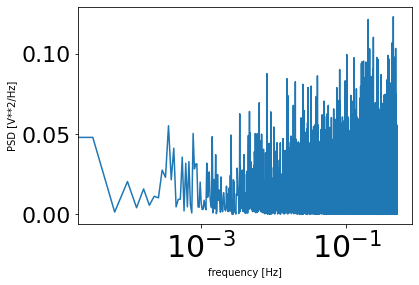

7.323802718589272

In [17]:
# The number at the bottom is the time period of the frequency with maximum amplitude
lc.psd()